In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Creating a CNN model

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img

import os
import pathlib

from tensorflow.keras.applications import imagenet_utils

In [3]:
path = pathlib.Path("/content/drive/MyDrive/dataset (1)/training")

In [4]:
lilly = list(path.glob('Lilly/*'))[:1000]
lotus = list(path.glob('Lotus/*'))[:1000]
orchid = list(path.glob('Orchid/*'))[:1000]
sunflower = list(path.glob('Sunflower/*'))[:1000]
tulip = list(path.glob('Tulip/*'))[:1000]

In [5]:
data = {
    'lilly' : lilly,
    'lotus' : lotus,
    'orchid' : orchid,
    'sunflower' : sunflower,
    'tulip': tulip
}
flower_labels= {k:v for k,v in enumerate(data.keys())}

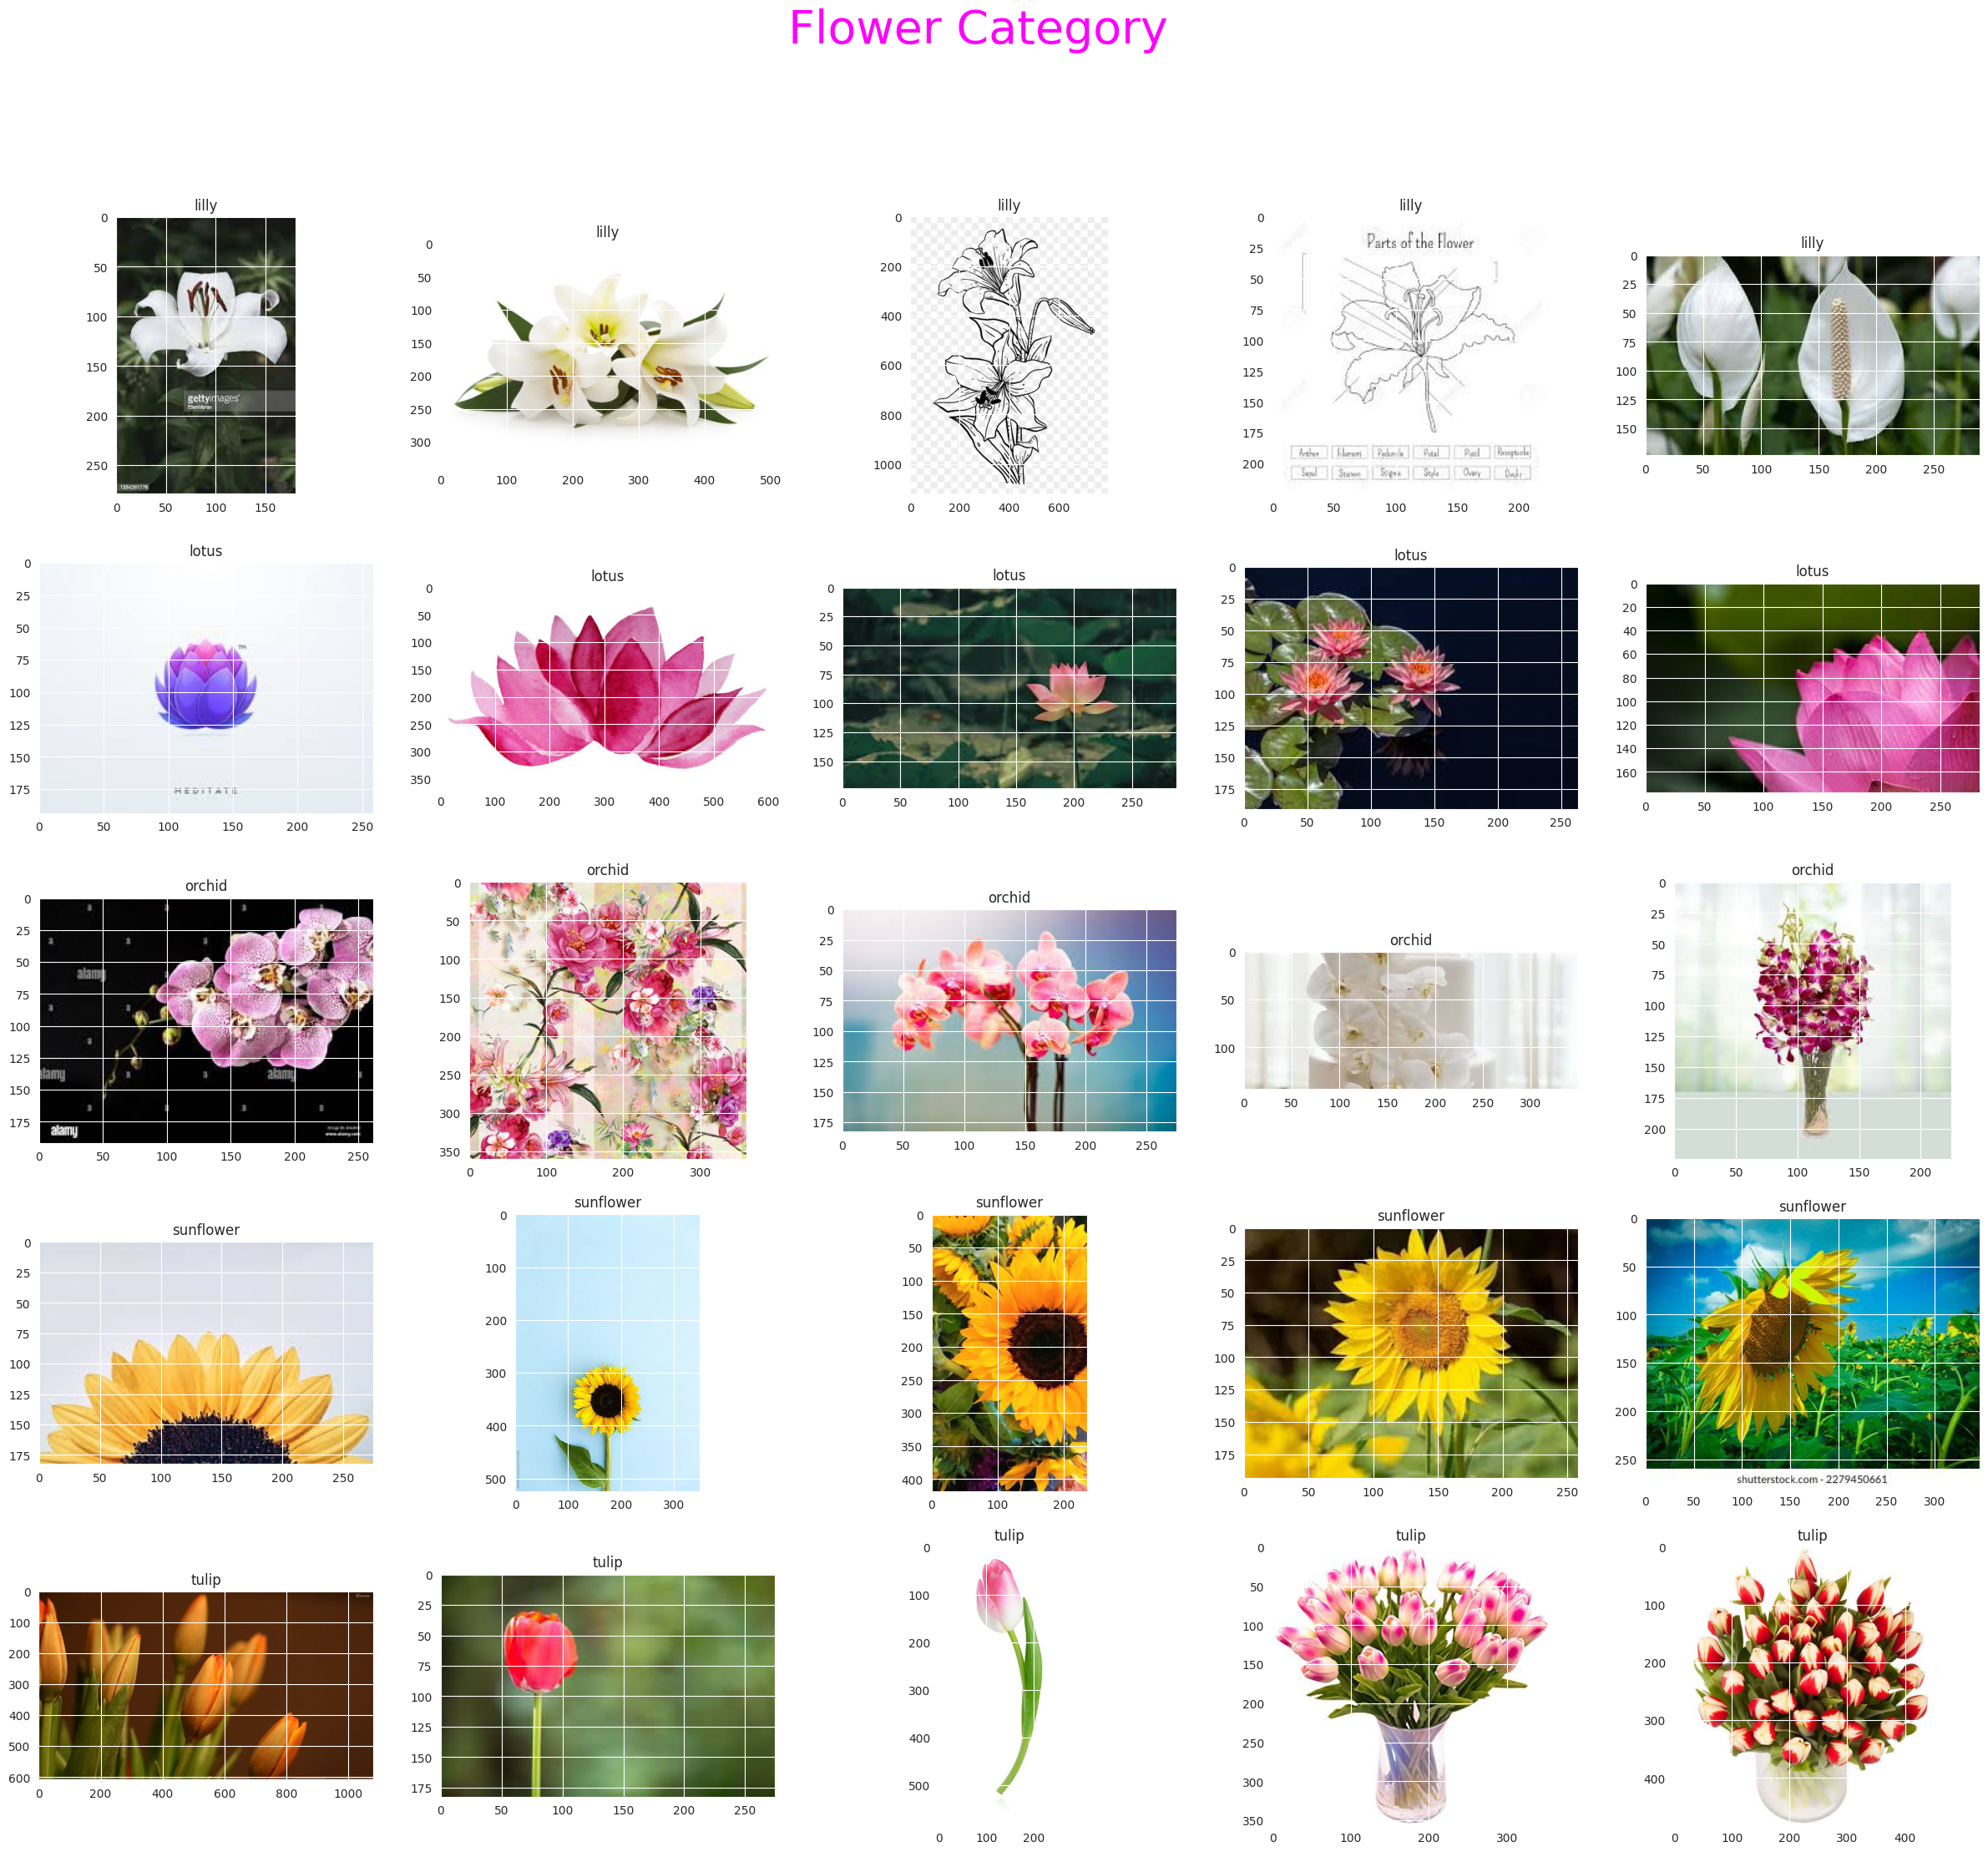

In [6]:
fig, ax = plt.subplots(5,5, figsize=(30,25))
fig.suptitle('Flower Category',color='magenta',fontsize=40)
for i in range(5):
    for j in range(5):
        image = img.imread(data.get(flower_labels.get(i))[j])
        ax[i, j].imshow(image)
        ax[i, j].set_title(flower_labels.get(i))

In [7]:
train_gen=ImageDataGenerator(rotation_range=10,
                                rescale = 1./255,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                vertical_flip=False,
                                zoom_range=0.1,
                                shear_range=0.1,
                                brightness_range=[0.8, 1.2],
                                fill_mode='nearest',
                                validation_split=0.2  # set validation split to 20%
                                )
train_data=train_gen.flow_from_directory("/content/drive/MyDrive/dataset (1)/training",target_size=(224,224),batch_size=32,
                                         class_mode='categorical',
                                         shuffle=True,
                                         subset='training')
test_data=train_gen.flow_from_directory("/content/drive/MyDrive/dataset (1)/validation",target_size=(224,224),batch_size=1,
                                        shuffle=False,subset='validation')

Found 4000 images belonging to 5 classes.
Found 30 images belonging to 5 classes.


In [8]:
def plot(c):
    plt.plot(c.history.history['accuracy'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_accuracy'],marker='*',color='green',markersize=10)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(c.history.history['loss'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_loss'],marker='*',color='green',markersize=10)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

In [9]:
model1=keras.models.Sequential()
model1.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                            padding='valid',activation='relu',input_shape=(224,224,3)))
model1.add(keras.layers.MaxPool2D(pool_size=2,strides=2))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(45,activation='relu'))
model1.add(keras.layers.Dense(15,activation='relu'))
model1.add(keras.layers.Dropout(rate= 0.1, seed= 100))
model1.add(keras.layers.Dense(units=5,activation='softmax'))

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 45)                17742285  
                                                                 
 dense_1 (Dense)             (None, 15)                690       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                        

In [11]:
model1.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [12]:
model1.fit(train_data,epochs=20,validation_data=test_data,shuffle=True,
         callbacks=keras.callbacks.EarlyStopping(monitor="val_loss",patience=10))

Epoch 1/20
125/125 [==============================] - 968s 8s/step - loss: 1.8509 - accuracy: 0.3940 - val_loss: 1.2520 - val_accuracy: 0.4000
Epoch 2/20
125/125 [==============================] - 75s 599ms/step - loss: 1.3242 - accuracy: 0.4920 - val_loss: 1.2162 - val_accuracy: 0.5667
Epoch 3/20
125/125 [==============================] - 73s 585ms/step - loss: 1.2041 - accuracy: 0.5385 - val_loss: 1.3174 - val_accuracy: 0.5000
Epoch 4/20
125/125 [==============================] - 74s 590ms/step - loss: 1.1553 - accuracy: 0.5583 - val_loss: 1.2320 - val_accuracy: 0.5667
Epoch 5/20
125/125 [==============================] - 75s 599ms/step - loss: 1.0869 - accuracy: 0.5922 - val_loss: 1.1290 - val_accuracy: 0.6000
Epoch 6/20
125/125 [==============================] - 73s 580ms/step - loss: 1.0939 - accuracy: 0.5890 - val_loss: 1.0569 - val_accuracy: 0.4667
Epoch 7/20
125/125 [==============================] - 74s 591ms/step - loss: 1.0426 - accuracy: 0.6173 - val_loss: 0.9928 - val_accu

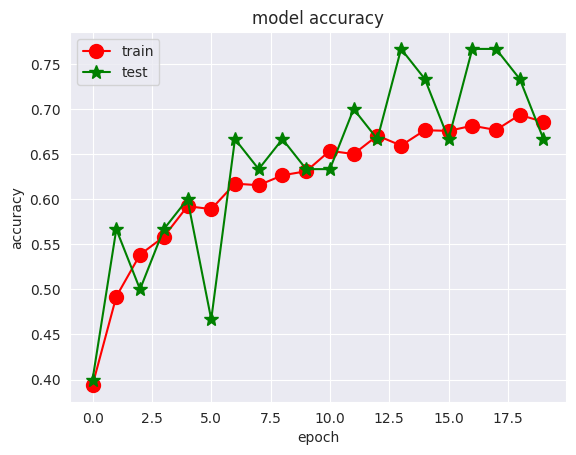

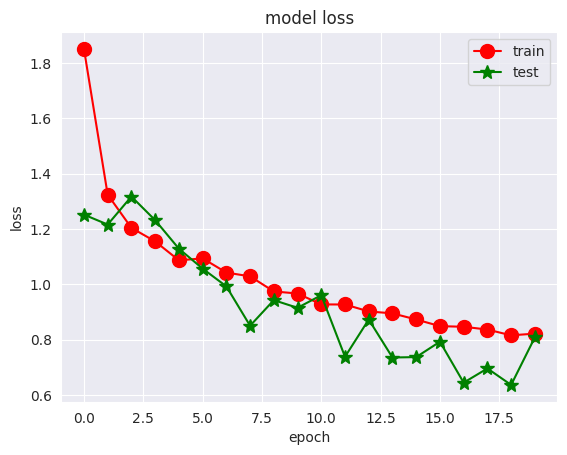

In [13]:
plot(model1)

In [14]:
y_pred = model1.predict(test_data)
main_y_pred = np.argmax(y_pred, axis=1)

30/30 [==============================] - 1s 16ms/step


In [15]:
test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)

predictions = model1.predict_generator(test_data, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [16]:
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

        Lily       0.67      0.67      0.67         6
       Lotus       0.56      0.71      0.63         7
      Orchid       0.67      0.57      0.62         7
   Sunflower       0.71      1.00      0.83         5
       Tulip       1.00      0.40      0.57         5

    accuracy                           0.67        30
   macro avg       0.72      0.67      0.66        30
weighted avg       0.70      0.67      0.66        30



### using pretrained model VGG 16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [ ]:
vgg16_file='../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg16=VGG16(include_top=False,input_shape=(224,224,3),weights=vgg16_file)

In [ ]:
def extract_features(generator, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Shape of the last convolutional layer in VGG16
    labels = np.zeros(shape=(sample_count))
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = vgg16.predict(inputs_batch)
        features[i * 32 : (i + 1) * 32] = features_batch
        labels[i * 32 : (i + 1) * 32] = np.argmax(labels_batch, axis=1)
        i += 1
        if i * 32 >= sample_count:
            break
    return features, labels


train_generator=ImageDataGenerator(rescale = 1./255)
generator = train_generator.flow_from_directory("/kaggle/input/5-flower-types-classification-dataset/flower_images",target_size=(224,224),batch_size=32,
                                         class_mode='categorical',
                                         shuffle=True)
train_sample_count = 5000

train_features, train_labels = extract_features(generator, train_sample_count)

In [ ]:
class_names = [i for i in data.keys()]
class_names

In [ ]:
flatten_features = train_features.reshape(train_features.shape[0], -1)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flatten_features)

# Plot the PCA results
plt.figure(figsize=(15,20))
for i, class_name in enumerate(class_names):
    plt.scatter(pca_result[:, 0][train_labels == i][:1000], pca_result[:, 1][train_labels == i][:1000], label = class_name, alpha=0.8)
  #  plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, alpha=0.6,cmap='hsv')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Visualization of Features')
plt.legend()
plt.colorbar()
plt.show()

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (7, 7, 512)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, epochs=15,validation_split=0.2)

In [ ]:
plot(model2)

### Using RESNET

In [ ]:
root="/kaggle/input/5-flower-types-classification-dataset/flower_images"
IMG_SIZE=224

In [ ]:
def view_random_image(root_path,folder,class_folder):
    path=root_path+'/'+folder+'/'+class_folder
    rand=random.choice(os.listdir(path))
    random_image=mpimg.imread(path+'/'+rand)
    plt.imshow(random_image)
    plt.title("File Name: " + rand)

#Pre-processing the Image
def pre_process_image(path, image_shape=224, channels=3, norm_factor=255.):
    '''Pre-Processing the Image before sending it to the model'''
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=channels)
    img = tf.image.resize(img, size = (image_shape, image_shape))
    img = tf.expand_dims(img, axis=0)
    img = img/norm_factor
    return img

def random_tester(root_path, classes, model, class_type="binary"):
    '''Random Class Folder Selection'''
    path=root_path
    class_folder=random.choice(os.listdir(path))

    '''Random File Selection'''
    folder_path=path+'/'+class_folder+'/'
    rand=random.choice(os.listdir(folder_path))
    file_path=folder_path+'/'+rand
    random_image=mpimg.imread(file_path)

    '''Prediction'''
    predicted_value=model.predict(pre_process_image(file_path))
    if(class_type=="binary"):
        predicted_label=classes[custom_rounder(predicted_value)]
    else:
        index=tf.math.round(predicted_value).numpy()
        index=np.argmax(index)
        predicted_label=classes[index]
    '''Visualize'''
    plt.imshow(random_image)
    plt.title("Prediction:" + predicted_label +"\n" +"True class: "+ class_folder)
    plt.show()

#Plot Loss and Accuracy curve for the given Model
def loss_curve_plot(df):
    """ Dataframe (df) is history of the fit of the NN model
    The df consists of train and validation fit data
    """
    history = df.history
    val_accuracy = history["val_accuracy"]
    val_loss = history["val_loss"]
    train_accuracy = history["accuracy"]
    train_loss = history["loss"]

    """Accuracy Plot"""
    plt.plot(train_accuracy, label="Train Accuracy")
    plt.plot(val_accuracy, label="Validation Accuracy")
    plt.title("Accuracy Curves")
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    """Loss Plot"""
    plt.plot(train_loss, label="Train loss")
    plt.plot(val_loss, label="Validation loss")
    plt.title("Loss Curves")
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

def confusion_matrix_plot(y_true, y_pred, figsize=(30,30)):
    """"Confusion Matrix for true values and predicted values"""
    cm = metrics.confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)
    plt.figure(figsize = figsize)
    sns.heatmap(cm, annot=True, cmap="crest")

#Supervised Learning Meterics
def supervised_metrics(y_true, y_pred):
    """Meterics for a Supervised Learning model:"""
    print("Accuracy : {} %".format(accuracy_score(y_true, y_pred)*100))
    print("F1 Score : {}".format(f1_score(y_true, y_pred, average='weighted')))
    print("Recall : {}".format(recall_score(y_true, y_pred, average='weighted')))
    print("Precision : {}".format(precision_score(y_true, y_pred, average='weighted')))

In [ ]:
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

train_datagen = data_augmentation.flow_from_directory(
    directory=root,
    batch_size=32,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode="categorical",
    subset="training",
    seed=42,
)

test_datagen = data_augmentation.flow_from_directory(
    directory=root,
    batch_size=32,
    target_size=(IMG_SIZE,IMG_SIZE),
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=42,
)

In [ ]:
model_base = ResNet101V2(
    input_shape=(224,224,3),
    include_top=False,
)
model_base.trainable = True

for layers in model_base.layers[:-30]:
    layers.trainable=False

#Transfer Learning Model
inputs=tf.keras.Input(shape=(224,224,3))
x=model_base(inputs)
x=lyrs.GlobalAveragePooling2D()(x)
x= lyrs.Dropout(0.5)(x)
outputs=lyrs.Dense(5, activation="softmax",
                     kernel_regularizer=tf.keras.regularizers.l2(1e-3))(x)

model3 = tf.keras.Model(inputs=inputs, outputs=outputs)
model3.summary()

In [ ]:
checkpointer = ModelCheckpoint('flower_image.hdf5',verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 3)

model3.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-4), metrics=["accuracy"])
model_history=model3.fit(x=train_datagen,
         steps_per_epoch=32,
         validation_data=test_datagen,
         epochs=50,
         callbacks=[checkpointer, early_stopping])

In [ ]:
 loss_curve_plot(model_history)

In [ ]:
labels=test_datagen.classes
model=tf.keras.models.load_model("/kaggle/working/flower_image.hdf5")
y_pred=model.predict(test_datagen)
prediction=tf.math.round(y_pred).numpy()
prediction=prediction.argmax(axis=1)

supervised_metrics(labels, prediction)

In [ ]:
confusion_matrix_plot(labels, prediction, figsize=(10,10))

In [ ]:
random_tester(root, ["Lilly", "Lotus", "Orchid", "Sunflower", "Tulip"], model, class_type="multi")

## Using Efficientnet

In [ ]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout,BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
data_dir=("/kaggle/input/5-flower-types-classification-dataset/flower_images")
filepath=[]
labels=[]
folds=os.listdir(data_dir)
for fold in folds:
    file_path=os.path.join(data_dir,fold)
    fpath=os.listdir(file_path)
    for f in fpath:
        fil_path=os.path.join(file_path,f)
        filepath.append(fil_path)
        labels.append(fold)
F_series=pd.Series(filepath , name="filepath")
l_series=pd.Series(labels, name="labels")
df=pd.concat([F_series,l_series],axis=1)

In [ ]:
df.head()

In [ ]:
df["labels"].value_counts()

In [ ]:
train_df , dummy_df=train_test_split(df,train_size=0.8,random_state=42,stratify=df["labels"])
valid_df,test_df=train_test_split(dummy_df,test_size=0.5,random_state=42,stratify=dummy_df["labels"])

In [ ]:
train_df["labels"].value_counts()

In [ ]:
batch_size=16
image_size=(224,224)
channels=3
image_shape=(image_size[0],image_size[1],channels)
tr_gen=ImageDataGenerator()
ts_gen=ImageDataGenerator()
train_gen=tr_gen.flow_from_dataframe(train_df,x_col="filepath",y_col="labels",target_size=image_size,
                                     class_mode="categorical",
                                    color_mode="rgb",batch_size=batch_size)
valid_gen=ts_gen.flow_from_dataframe(valid_df,x_col="filepath",y_col="labels",target_size=image_size,
                                     class_mode="categorical",
                                    color_mode="rgb",batch_size=batch_size)
test_gen=ts_gen.flow_from_dataframe(test_df,x_col="filepath",y_col="labels",target_size=image_size,
                                    class_mode="categorical",
                                    color_mode="rgb",batch_size=batch_size)

In [ ]:
g_dict=train_gen.class_indices
classes=list(g_dict.keys())
images,labels=next(train_gen)
plt.figure(figsize=(20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image=images[i]/255
    plt.imshow(image)
    index=np.argmax(labels[i])
    classes_name=classes[index]
    plt.title(classes_name,color="blue",fontsize=15)
    plt.axis('off')


plt.show()

In [ ]:
batch_size=16
image_size=(224,224)
channel=3
image_shape=(image_size[0],image_size[1],channel)
class_count=len(list(classes))
base_model=keras.applications.ResNet50(include_top=False,weights="imagenet",
                                          input_shape=image_shape)
model=Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256,activation = 'relu'),
    Dropout(0.2),
    Dense(class_count , activation= 'softmax' )

])
model.compile(Adamax(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

In [ ]:
history=model.fit(train_gen,epochs=10,verbose=1,validation_data=valid_gen)

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
train_score = model.evaluate(train_gen,verbose= 1)
valid_score = model.evaluate(valid_gen,verbose= 1)
test_score = model.evaluate(test_gen,verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

In [ ]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

In [ ]:
plt.figure(figsize=(10,5))
cm=confusion_matrix(test_gen.classes,y_pred)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

## DenseNet

In [ ]:
import os
import shutil
import itertools
from PIL import Image

#Data Handling Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay

#DeepLearning Tools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Activation , BatchNormalization , Dropout
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

#warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
tr_data = '/kaggle/input/5-flower-types-classification-dataset/flower_images'

filepath =[]
label = []

folds = os.listdir(tr_data)

for fold in folds:
    f_path = os.path.join(tr_data , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

fseires = pd.Series(filepath , name= 'filepath')
lseries = pd.Series(label , name = 'label')
tr_df = pd.concat([fseires ,lseries ] , axis = 1)

In [ ]:
tr_df

In [ ]:
train , dummy = train_test_split(tr_df ,train_size = 0.8 , shuffle = True ,random_state = 42 )
valid , test = train_test_split(dummy ,test_size= 0.5 , shuffle = True ,random_state = 42)

In [ ]:
print(f"The shape of The Train data is: {train.shape}")
print(f"The shape of The Validation data is: {valid.shape}")
print(f"The shape of The Test data is: {test.shape}")

In [ ]:
img_size = (224,224)
channels = 3
num_batches = 16

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train , x_col = 'filepath' , y_col = 'label',target_size=img_size ,
                                       class_mode = 'categorical' ,color_mode= 'rgb',shuffle = True , batch_size= num_batches)
valid_gen = ts_gen.flow_from_dataframe(valid , x_col ='filepath',y_col = 'label', target_size = img_size ,
                                       class_mode= 'categorical', color_mode = 'rgb',shuffle= True, batch_size = num_batches)
test_gen = ts_gen.flow_from_dataframe(test, x_col= 'filepath', y_col= 'label', target_size = img_size,
                                      class_mode= 'categorical',color_mode= 'rgb',shuffle = False , batch_size= num_batches)

In [ ]:
dict_gen = train_gen.class_indices
classes = list(dict_gen.keys())
images , labels = next(train_gen)

plt.figure(figsize=(20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 15)
    plt.axis('off')
plt.show();

In [ ]:
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(classes)

base_model = tf.keras.applications.DenseNet121(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

In [ ]:
epochs = 15
history = model.fit(train_gen , epochs = epochs , verbose = 1,validation_data= valid_gen, validation_steps=None ,shuffle= False)

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_highest = val_acc[index_acc]
val_lowest = val_loss[index_loss]

epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch is: {str(index_loss +1)}'
acc_label = f'Best Epoch is: {str(index_acc + 1)}'


plt.figure(figsize= (20,8))

plt.subplot(1,2,1)
plt.plot(epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(epochs, val_acc , 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue', label= acc_label)
plt.title('Training Vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_loss , 'r' , label= 'Training Loss')
plt.plot(epochs , val_loss , 'g' , label= 'Validation Loss')
plt.scatter(index_loss +1, val_lowest , s = 150 , c = 'blue' , label= loss_label)
plt.title('Training Vs Validation (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show();

In [ ]:
train_score = model.evaluate(train_gen , steps = 16 , verbose= 1)
val_score = model.evaluate(valid_gen , steps= 16, verbose= 1)
test_score = model.evaluate(test_gen , steps =16 , verbose = 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", val_score[0])
print("Validation Accuracy: ", val_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds , axis= 1)

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(test_gen.classes, y_pred , target_names= classes ))